In [3]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [7]:
(X_train, y_train),(X_test, y_test)=datasets.cifar10.load_data()

In [8]:
X_train.shape

(50000, 32, 32, 3)

In [9]:
X_test.shape

(10000, 32, 32, 3)

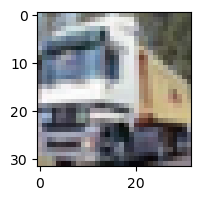

In [10]:
plt.figure(figsize=(15,2))
plt.imshow(X_train[1])

In [11]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [12]:
y_train=y_train.reshape(-1,)

In [13]:
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [14]:
classes=["airplane"," automobile", "bird", "cat","deer","dog","frog","horse","ship","truck"]

In [15]:
classes[5]

'dog'

In [16]:
def plot_sample(X, y, index):
    plt.figure(figsize=(15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

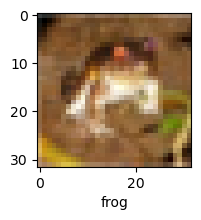

In [17]:
plot_sample(X_train, y_train,0)

In [18]:
X_train= X_train /255
X_test= X_test /255

In [21]:
cnn= models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])


In [22]:
cnn.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])


In [23]:
cnn.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - accuracy: 0.4055 - loss: 1.6489
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.5879 - loss: 1.1703
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.6417 - loss: 1.0296
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - accuracy: 0.6725 - loss: 0.9445
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - accuracy: 0.6937 - loss: 0.8860


In [24]:
cnn.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.6374 - loss: 1.0257


[1.039351224899292, 0.6362000107765198]

In [25]:
y_test

array([[3],
       [8],
       [8],
       ...,
       [5],
       [1],
       [7]], dtype=uint8)

In [26]:
y_test=y_test.reshape(-1,)
y_test

array([3, 8, 8, ..., 5, 1, 7], dtype=uint8)

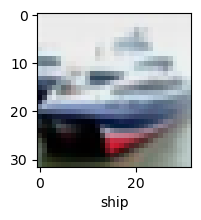

In [84]:
classes

['airplane',
 ' automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [27]:
y_pred=cnn.predict(X_test)
y_pred[:5]

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


array([[3.6902844e-03, 1.3383313e-04, 1.5531722e-02, 6.8732136e-01,
        4.5058113e-03, 6.5075010e-02, 6.4066611e-03, 7.9424935e-04,
        2.1426490e-01, 2.2761985e-03],
       [1.2841632e-02, 1.6396612e-01, 4.5722313e-06, 2.1746523e-06,
        3.9122838e-06, 1.0612764e-07, 8.0699289e-07, 4.4502645e-08,
        8.2296520e-01, 2.1535350e-04],
       [2.5092208e-01, 4.8145454e-02, 7.4906982e-03, 5.1671108e-03,
        8.2352594e-04, 2.3114280e-04, 6.0028658e-05, 2.7941685e-04,
        6.7381871e-01, 1.3061896e-02],
       [3.4000677e-01, 2.5716152e-02, 9.1092721e-02, 2.0776140e-03,
        5.8298716e-03, 6.4104956e-05, 2.2459649e-03, 8.1322556e-05,
        5.2813542e-01, 4.7499849e-03],
       [1.8953569e-05, 8.1931874e-05, 1.6665343e-02, 3.0737355e-02,
        1.8630093e-01, 2.6798167e-03, 7.6320136e-01, 7.2124012e-06,
        2.7812549e-04, 2.8980563e-05]], dtype=float32)

In [28]:
y_classes=[np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 8, 8, 6]

In [29]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

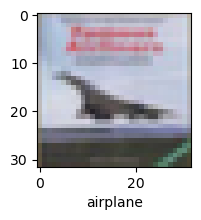

In [32]:
plot_sample(X_test,y_test,3)

In [36]:
classes[y_classes[4]]


'frog'